In [ ]:
#import libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import matplotlib.image as img
import os

In [ ]:
#our dataset is from kaggle
!pip install kaggle

In [ ]:
#we created an API token for kaggle (kaggle.json file)
#make a directory with a name : kaggle
!mkdir ~/.kaggle

In [ ]:
#copy kaggle.json file to kaggle 
!cp kaggle.json ~/.kaggle/

In [ ]:
#change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#download the dataset
!kaggle datasets download -d badasstechie/celebahq-resized-256x256

 99% 281M/283M [00:09<00:00, 44.0MB/s]
100% 283M/283M [00:09<00:00, 30.6MB/s]


In [ ]:
!unzip celebahq-resized-256x256.zip

A streamkimeneten csak az utolsó 5000 sor látható.
  inflating: celeba_hq_256/25000.jpg  
  inflating: celeba_hq_256/25001.jpg  
  inflating: celeba_hq_256/25002.jpg  
  inflating: celeba_hq_256/25003.jpg  
  inflating: celeba_hq_256/25004.jpg  
  inflating: celeba_hq_256/25005.jpg  
  inflating: celeba_hq_256/25006.jpg  
  inflating: celeba_hq_256/25007.jpg  
  inflating: celeba_hq_256/25008.jpg  
  inflating: celeba_hq_256/25009.jpg  
  inflating: celeba_hq_256/25010.jpg  
  inflating: celeba_hq_256/25011.jpg  
  inflating: celeba_hq_256/25012.jpg  
  inflating: celeba_hq_256/25013.jpg  
  inflating: celeba_hq_256/25014.jpg  
  inflating: celeba_hq_256/25015.jpg  
  inflating: celeba_hq_256/25016.jpg  
  inflating: celeba_hq_256/25017.jpg  
  inflating: celeba_hq_256/25018.jpg  
  inflating: celeba_hq_256/25019.jpg  
  inflating: celeba_hq_256/25020.jpg  
  inflating: celeba_hq_256/25021.jpg  
  inflating: celeba_hq_256/25022.jpg  
  inflating: celeba_hq_256/25023.jpg  
  inflating: 

In [ ]:
#get the name of the images
arr=os.listdir('celeba_hq_256')

base_dir = 'celeba_hq_256' # Windows
#base_dir = '/tmp/celeba_hq_256' # Linux esetén ?

# ehhez át kéne másolni a fájlokat a mappákba
#train_dir = os.path.join(base_dir, 'train')
#validation_dir = os.path.join(base_dir, 'validation')

train_fnames = os.listdir(base_dir)
print(train_fnames[:10])

['03456.jpg', '16316.jpg', '24351.jpg', '27387.jpg', '29351.jpg', '28974.jpg', '27143.jpg', '04680.jpg', '10613.jpg', '26738.jpg']


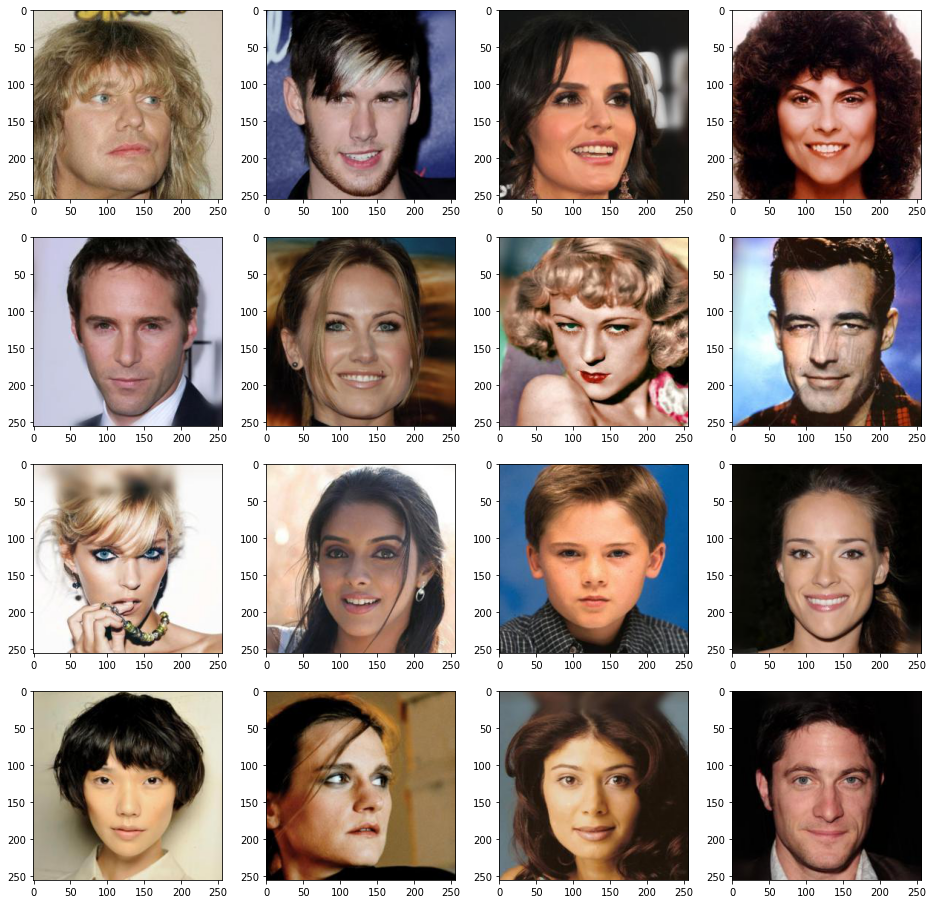

In [14]:
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

next_images = [os.path.join(base_dir, fname) for fname in train_fnames[:int(ncols*nrows)]]

for i, img_path in enumerate(next_images):
    sp = plt.subplot(nrows, ncols, i + 1)
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [ ]:
#read images in
#images=[]
#for i in arr:
#  image=img.imread("celeba_hq_256/"+i)
#  images.append(image)

KeyboardInterrupt: ignored

In [ ]:
#split the dataset into two parts
#validation split later in model.fit function
test_split = 0.1
num_of_picture=len(base_dir)

# a fájlnevekkel kéne
#celeba_train = np.asarray(images[0:int(num_of_picture*(1-test_split))])
#celeba_test  = np.asarray(images[int(num_of_picture*(1-test_split)):])

In [15]:
#print the shape of the dataset
#print(next_images.shape)
#print(celeba_test.shape)

AttributeError: ignored

In [ ]:
celeba_train /= 255
celeba_test /= 255